Import dependenceies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


Data collection and Analysis

In [2]:
# loading the data from csvfile to a pandas dataframe

insurance_dataset = pd.read_csv('/content/insurance.csv')
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [9]:
# information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Catagorical features
--------------------
sex, smoker, region

In [11]:
# checking for any missing values
insurance_dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Data Analysis

In [12]:
# statistical values of dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/tmp/ipython-input-15-453388633.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


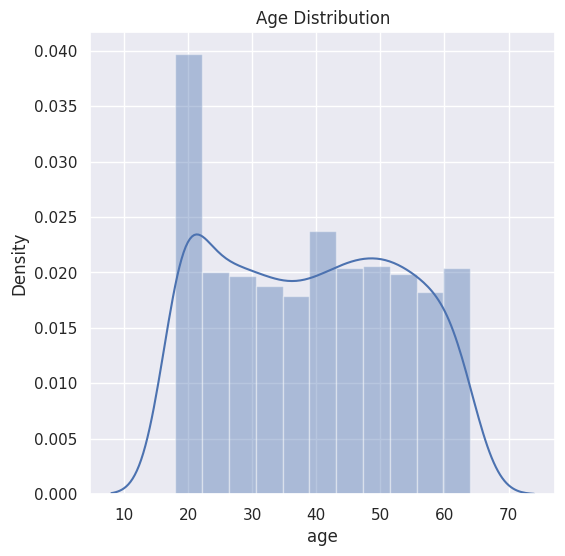

In [15]:
# distribution of age values
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

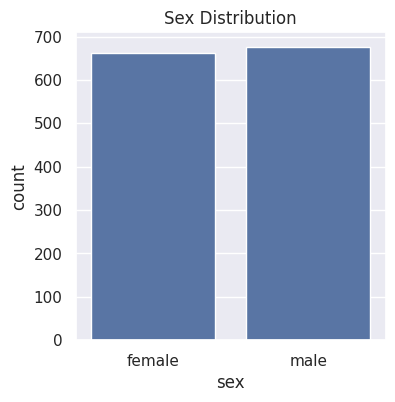

In [17]:
# distribution of sex values
plt.figure(figsize=(4,4))
sns.countplot(x='sex',data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

/tmp/ipython-input-19-848680366.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


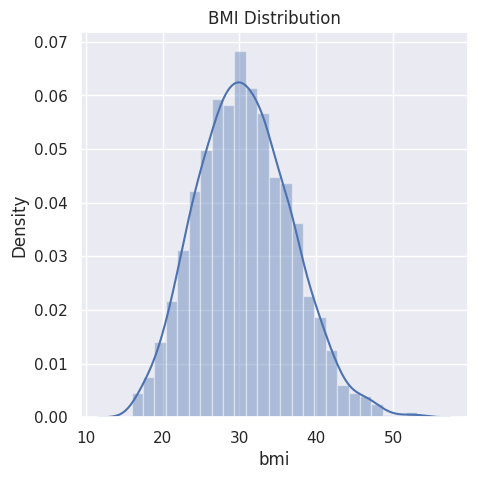

In [19]:
# distribution of bmi values
plt.figure(figsize=(5,5))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI range --- 18.5 - 24,5
grom this we can understand almost all the persons are over weight

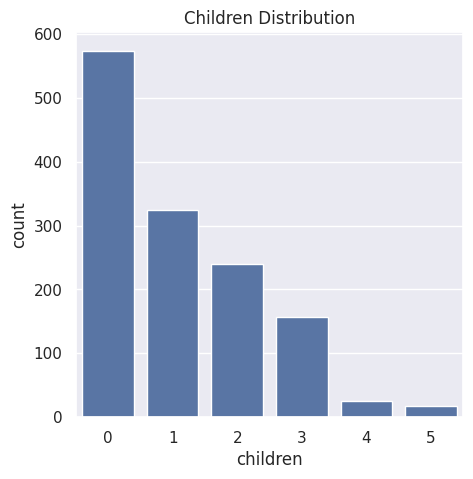

In [20]:
# distribution of childern values
plt.figure(figsize=(5,5))
sns.countplot(x='children',data=insurance_dataset)
plt.title('Children Distribution')
plt.show()

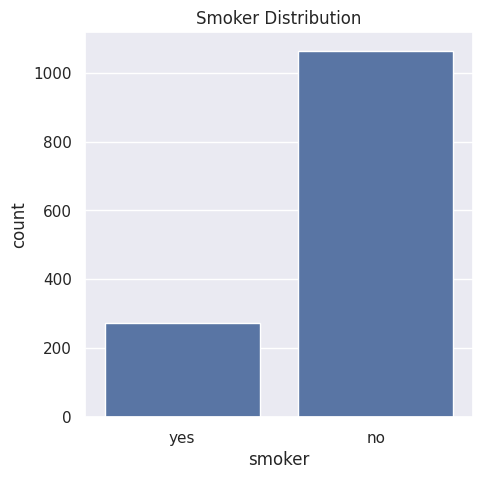

In [22]:
# distribution of smoker values
plt.figure(figsize=(5,5))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('Smoker Distribution')
plt.show()

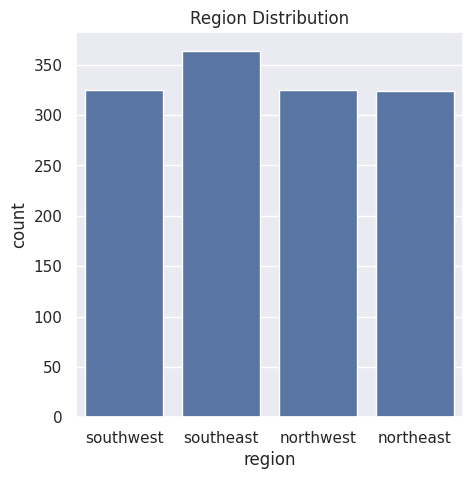

In [23]:
# distribution of region values
plt.figure(figsize=(5,5))
sns.countplot(x='region',data=insurance_dataset)
plt.title('Region Distribution')
plt.show()

In [29]:
insurance_dataset['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


/tmp/ipython-input-24-4049583699.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


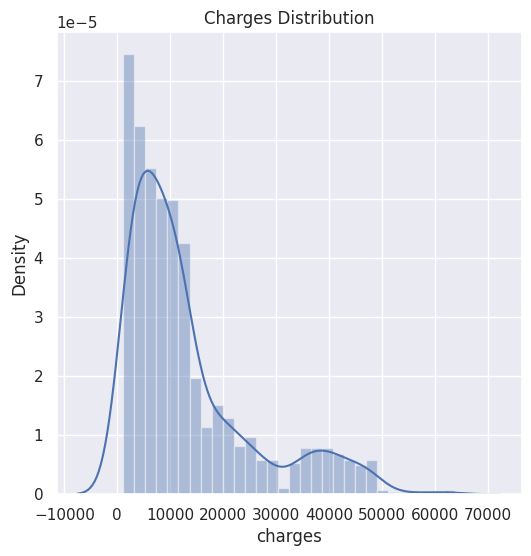

In [24]:
# distribution of charges values
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

Encoding the catagorical features

In [26]:
# encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)

In [28]:
# encoding smoker column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)

In [39]:
# encoding region column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)

/tmp/ipython-input-39-3432832738.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)


In [40]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


In [41]:
insurance_dataset['region'].value_counts()

,count
region,
0,364
1,325
2,325
3,324


Spliting the features and target

In [42]:
X = insurance_dataset.drop(columns='charges',axis=1)
Y = insurance_dataset['charges']

In [43]:
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       2
4      32    0  28.880         0       1       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       2
1334   18    1  31.920         0       1       3
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       2

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Spliting the data into training and test data

In [47]:
x_train,x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=2)

In [48]:
print(X.shape, x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model training : Linear Regression Model

In [49]:
# loading the model
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

Model Evaluation

In [51]:
# prediction on training data

training_data_prediction = model.predict(x_train)

In [53]:
# R-square value
r2_train = metrics.r2_score(y_train,training_data_prediction)
print('R square value for training data :', r2_train)

R square value for training data : 0.7518195459072954


In [54]:
# prediction on test data

test_data_prediction = model.predict(x_test)

In [55]:
# R-square value
r2_test = metrics.r2_score(y_test,test_data_prediction)
print('R square value for test data :', r2_test)

R square value for test data : 0.7454471618659976


Buliding a predictive system

In [56]:
input_data = (32,1,28.88,0,1,2)
input_data_array = np.asarray(input_data)


In [57]:
# reshape the array
input_data_reshaped = input_data_array.reshape(1,-1)

In [60]:
prediction = model.predict(input_data_reshaped)
print(prediction)
print('The insuarance cost is :',prediction[0])

[5511.8742277]
The insuarance cost is : 5511.874227698399


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
